In [1]:
from datetime import datetime
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
import pandas_datareader.data as web

In [6]:
import yfinance as yf

In [5]:
web.DataReader('MSFT', 'yahoo', start='2010-01')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.990000,30.480000,30.980000,30.480000,31929700.0,23.438795
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,23.800222
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,23.807915
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,23.661810
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.415730
...,...,...,...,...,...,...
2022-06-02,274.649994,261.600006,264.450012,274.579987,44008200.0,274.579987
2022-06-03,273.450012,268.410004,270.309998,270.019989,28048000.0,270.019989
2022-06-06,274.179993,267.220001,272.059998,268.750000,22400300.0,268.750000


In [9]:
yf.Ticker('MSFT').history(start='2010-01-01')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-12-31,23.823298,23.830988,23.438803,23.438803,31929700,0.0,0
2010-01-04,23.546456,23.915571,23.523386,23.800222,38409100,0.0,0
2010-01-05,23.723321,23.915569,23.561833,23.807909,49749600,0.0,0
2010-01-06,23.746392,23.900191,23.469557,23.661804,58182400,0.0,0
2010-01-07,23.554146,23.607977,23.215792,23.415730,50559700,0.0,0
...,...,...,...,...,...,...,...
2022-06-02,264.450012,274.649994,261.600006,274.579987,44008200,0.0,0
2022-06-03,270.309998,273.450012,268.410004,270.019989,28048000,0.0,0
2022-06-06,272.059998,274.179993,267.220001,268.750000,22400300,0.0,0


In [16]:

class YFinance():
    def __init__(self, tickers, period):
        self.tickers = tickers
        self.period = period
            
    def get_price(self):
        df = pd.DataFrame()
        for ticker in self.tickers:
            df[ticker] = yf.Ticker(ticker).history(start=self.period[0], end=self.period[1])['Close']
        return df
        
    def get_dividence(self):
        df = pd.DataFrame()
        for ticker in self.tickers:
            df[ticker] = yf.Ticker(ticker).history(start=self.period[0], end=self.period[1])['Dividends']
        return df
        
        
    

In [93]:
us_tickers = ['MSFT', 'NFLX', 'FB', 'AMZN']
kr_tickers = ['005930.KS', '000660.KS', '035420.KS', '035720.KS']

us_finance = YFinance(us_tickers, period=('2010-01-01', '2022-06-01'))
kr_finance = YFinance(kr_tickers, period=('2010-01-01', '2022-06-01'))

df_us_price = us_finance.get_price()
df_kr_price = kr_finance.get_price()

In [18]:
df_us_price

,MSFT,NFLX,FB,AMZN
Date,,,,
2009-12-31,23.438797,7.870000,NaN,6.726000
2010-01-04,23.800226,7.640000,NaN,6.695000
2010-01-05,23.807911,7.358571,NaN,6.734500
2010-01-06,23.661804,7.617143,NaN,6.612500
2010-01-07,23.415730,7.485714,NaN,6.500000
...,...,...,...,...
2022-05-24,259.619995,180.339996,181.279999,104.099998
2022-05-25,262.519989,187.830002,183.830002,106.775002
2022-05-26,265.899994,191.399994,191.630005,111.077499


In [19]:
df_kr_price

,005930.KS,000660.KS,035420.KS,035720.KS
Date,,,,
2010-01-04,12889.119141,21212.414062,46347.308594,13948.366211
2010-01-05,13096.236328,20552.271484,46347.308594,14062.385742
2010-01-06,13398.950195,21608.492188,46107.160156,14119.394531
2010-01-07,12952.850586,21476.464844,46227.234375,13948.366211
2010-01-08,13080.307617,21696.513672,44666.312500,13853.348633
...,...,...,...,...
2022-05-25,66400.000000,108000.000000,266000.000000,81800.000000
2022-05-26,65900.000000,103000.000000,266000.000000,81500.000000
2022-05-27,66500.000000,106000.000000,270000.000000,81700.000000


In [110]:
df_kr_price.columns = ['Samsung','SKHY', 'NAVER', 'KAKAO']
df_kr_price

,Samsung,SKHY,NAVER,KAKAO
Date,,,,
2010-01-04,12889.122070,21212.412109,46347.300781,13948.365234
2010-01-05,13096.241211,20552.273438,46347.300781,14062.385742
2010-01-06,13398.951172,21608.496094,46107.164062,14119.394531
2010-01-07,12952.850586,21476.464844,46227.234375,13948.365234
2010-01-08,13080.309570,21696.515625,44666.320312,13853.350586
...,...,...,...,...
2022-05-25,66400.000000,108000.000000,266000.000000,81800.000000
2022-05-26,65900.000000,103000.000000,266000.000000,81500.000000
2022-05-27,66500.000000,106000.000000,270000.000000,81700.000000


In [111]:
df_us_div = us_finance.get_dividence()
df_kr_div = kr_finance.get_dividence()
df_kr_div.columns = df_kr_price.columns

In [107]:
df_us_price = df_us_price.dropna()
df_us_price

,MSFT,NFLX,FB,AMZN
Date,,,,
2012-05-18,23.898617,9.994286,38.230000,10.692500
2012-05-21,24.290531,10.248571,34.029999,10.905500
2012-05-22,24.298698,9.672857,31.000000,10.766500
2012-05-23,23.767982,10.272857,32.000000,10.864000
2012-05-24,23.735323,10.038571,33.029999,10.762000
...,...,...,...,...
2022-05-24,259.619995,180.339996,181.279999,104.099998
2022-05-25,262.519989,187.830002,183.830002,106.775002
2022-05-26,265.899994,191.399994,191.630005,111.077499


<AxesSubplot:xlabel='Date'>

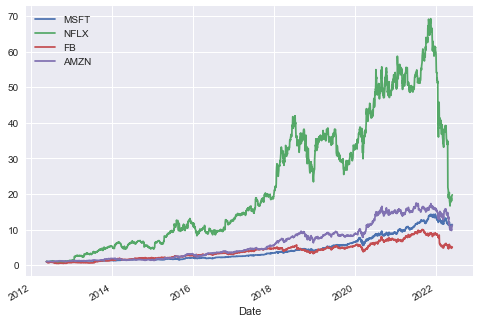

In [26]:
(df_us_price / df_us_price.iloc[0]).plot()

<AxesSubplot:xlabel='Date'>

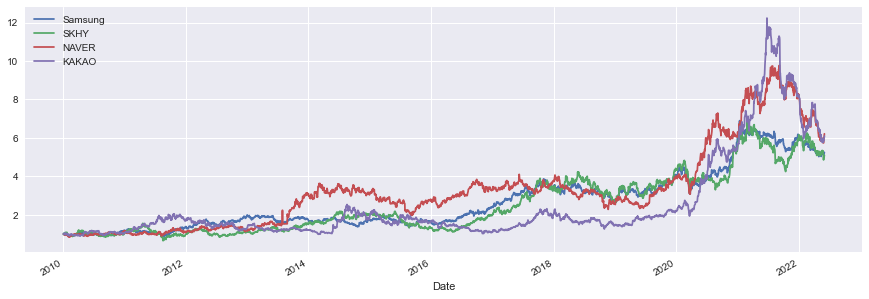

In [28]:

(df_kr_price/df_kr_price.iloc[0]).plot(figsize=(15,5))

In [30]:
df_kr_price

,Samsung,SKHY,NAVER,KAKAO
Date,,,,
2010-01-04,12889.119141,21212.414062,46347.308594,13948.366211
2010-01-05,13096.236328,20552.271484,46347.308594,14062.385742
2010-01-06,13398.950195,21608.492188,46107.160156,14119.394531
2010-01-07,12952.850586,21476.464844,46227.234375,13948.366211
2010-01-08,13080.307617,21696.513672,44666.312500,13853.348633
...,...,...,...,...
2022-05-25,66400.000000,108000.000000,266000.000000,81800.000000
2022-05-26,65900.000000,103000.000000,266000.000000,81500.000000
2022-05-27,66500.000000,106000.000000,270000.000000,81700.000000


In [29]:
df_kr_price.shift()

,Samsung,SKHY,NAVER,KAKAO
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,12889.119141,21212.414062,46347.308594,13948.366211
2010-01-06,13096.236328,20552.271484,46347.308594,14062.385742
2010-01-07,13398.950195,21608.492188,46107.160156,14119.394531
2010-01-08,12952.850586,21476.464844,46227.234375,13948.366211
...,...,...,...,...
2022-05-25,66500.000000,108500.000000,266000.000000,80600.000000
2022-05-26,66400.000000,108000.000000,266000.000000,81800.000000
2022-05-27,65900.000000,103000.000000,266000.000000,81500.000000


In [32]:
df_kr_price / df_kr_price.shift() - 1

,Samsung,SKHY,NAVER,KAKAO
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.016069,-0.031121,0.000000,0.008174
2010-01-06,0.023115,0.051392,-0.005181,0.004054
2010-01-07,-0.033294,-0.006110,0.002604,-0.012113
2010-01-08,0.009840,0.010246,-0.033766,-0.006812
...,...,...,...,...
2022-05-25,-0.001504,-0.004608,0.000000,0.014888
2022-05-26,-0.007530,-0.046296,0.000000,-0.003667
2022-05-27,0.009105,0.029126,0.015038,0.002454


In [33]:
return_kr = df_kr_price.pct_change()
return_us = df_us_price.pct_change()

In [44]:
r_a_kr = (df_kr_price.iloc[-1]+df_kr_div.sum()) / df_kr_price.iloc[0] - 1
r_a_us = (df_us_price.iloc[-1]+df_us_div.sum()) / df_us_price.iloc[0] - 1

In [46]:
r_a_kr

Samsung    5.053711
SKHY       4.483110
NAVER      5.278207
KAKAO      5.179181
dtype: float64

In [47]:
r_a_us

MSFT    11.119531
NFLX    18.755289
FB       4.065132
AMZN    10.242413
dtype: float64

In [53]:
df_us_price.shape[0]

2525

In [56]:
r_a_us_daily = (1+r_a_us)**(1/df_us_price.shape[0]) - 1
r_a_us_daily    

MSFT    0.000989
NFLX    0.001182
FB      0.000643
AMZN    0.000959
dtype: float64

In [57]:
r_a_kr_daily = (1+r_a_kr)**(1/df_kr_price.shape[0]) - 1
r_a_kr_daily    

Samsung    0.000589
SKHY       0.000556
NAVER      0.000601
KAKAO      0.000595
dtype: float64

In [62]:
import numpy as np

weights = np.ones(4) * 0.25
weights

array([0.25, 0.25, 0.25, 0.25])

In [63]:
r_a_us_daily

MSFT    0.000989
NFLX    0.001182
FB      0.000643
AMZN    0.000959
dtype: float64

In [66]:
port_return_us = np.dot(weights, r_a_us)
port_return_us

11.045591273207428

In [67]:
port_return_kr = np.dot(weights, r_a_kr)
port_return_kr

4.998552288001594

In [69]:
return_us.corr()

,MSFT,NFLX,FB,AMZN
MSFT,1.000000,0.364644,0.440689,0.569155
NFLX,0.364644,1.000000,0.329135,0.449834
FB,0.440689,0.329135,1.000000,0.474841
AMZN,0.569155,0.449834,0.474841,1.000000


In [70]:
return_us.cov()

,MSFT,NFLX,FB,AMZN
MSFT,0.000271,0.000184,0.000176,0.000184
NFLX,0.000184,0.000938,0.000245,0.000270
FB,0.000176,0.000245,0.000589,0.000226
AMZN,0.000184,0.000270,0.000226,0.000385


In [72]:
cov_us = return_us.cov()*return_us.shape[0]
cov_us

,MSFT,NFLX,FB,AMZN
MSFT,0.684428,0.464360,0.444431,0.464390
NFLX,0.464360,2.369427,0.617596,0.682908
FB,0.444431,0.617596,1.485995,0.570880
AMZN,0.464390,0.682908,0.570880,0.972694


In [73]:
cov_kr = return_kr.cov()*return_kr.shape[0]
cov_kr

,Samsung,SKHY,NAVER,KAKAO
Samsung,0.880481,0.641910,0.272273,0.196244
SKHY,0.641910,1.757657,0.288064,0.317923
NAVER,0.272273,0.288064,1.934970,0.559208
KAKAO,0.196244,0.317923,0.559208,1.669729


<AxesSubplot:>

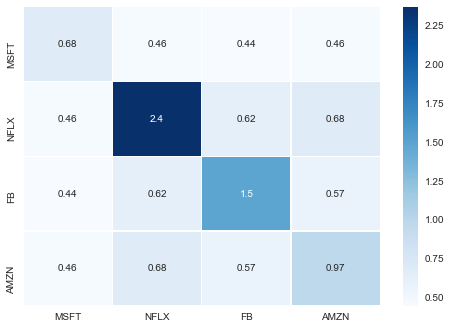

In [75]:
sns.heatmap(cov_us, cmap='Blues', linewidth=0.2, annot=True)

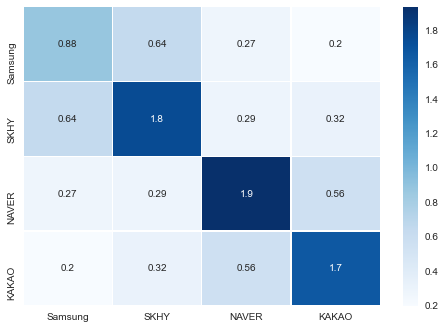

In [77]:
sns.heatmap(cov_kr, cmap='Blues', linewidth=0.2, annot=True);

In [78]:
port_risk_us = np.dot(weights.T, np.dot(cov_us, weights))
print(port_risk_us)
port_risk_kr = np.dot(weights.T, np.dot(cov_kr, weights))
print(port_risk_kr)

0.7501048395090871
0.6746300584409796


In [79]:
port_return_us

11.045591273207428

In [80]:
rf = 0.02 # 무위험 자산 평균 수익률
port_sr_us = (port_return_us - rf) / port_risk_us  # 초과수익 알파를 리스크로 나눈 값
port_sr_kr = (port_return_kr - rf) / port_risk_kr


In [81]:
print(port_sr_us)
print(port_sr_kr)

14.69873368691132
7.379677536910618


In [89]:
0.8 / (0.7)  # 위험(0.7) 대비 알파(0.8)가 1.1배

1.142857142857143

In [88]:
0.8 / (0.3) # 위험(0.3) 대비 알파(0.8)가 2.6배

2.666666666666667

In [90]:
0.04 / 0.2

0.19999999999999998

In [92]:
0.05 / 0.2

0.25

In [94]:
df_kr_price

,005930.KS,000660.KS,035420.KS,035720.KS
Date,,,,
2010-01-04,12889.122070,21212.412109,46347.300781,13948.365234
2010-01-05,13096.241211,20552.273438,46347.300781,14062.385742
2010-01-06,13398.951172,21608.496094,46107.164062,14119.394531
2010-01-07,12952.850586,21476.464844,46227.234375,13948.365234
2010-01-08,13080.309570,21696.515625,44666.320312,13853.350586
...,...,...,...,...
2022-05-25,66400.000000,108000.000000,266000.000000,81800.000000
2022-05-26,65900.000000,103000.000000,266000.000000,81500.000000
2022-05-27,66500.000000,106000.000000,270000.000000,81700.000000


In [95]:
df_us_price

,MSFT,NFLX,FB,AMZN
Date,,,,
2009-12-31,23.438799,7.870000,NaN,6.726000
2010-01-04,23.800228,7.640000,NaN,6.695000
2010-01-05,23.807922,7.358571,NaN,6.734500
2010-01-06,23.661800,7.617143,NaN,6.612500
2010-01-07,23.415728,7.485714,NaN,6.500000
...,...,...,...,...
2022-05-24,259.619995,180.339996,181.279999,104.099998
2022-05-25,262.519989,187.830002,183.830002,106.775002
2022-05-26,265.899994,191.399994,191.630005,111.077499


In [100]:
weights = np.random.rand(df_kr_price.shape[1])
weights = weights / np.sum(weights)
weights


array([0.26777299, 0.12574001, 0.33105336, 0.27543363])

In [102]:
r_a_kr

Samsung    5.053711
SKHY       4.483110
NAVER      5.278207
KAKAO      5.179181
dtype: float64

In [113]:
return_kr

,Samsung,SKHY,NAVER,KAKAO
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.016069,-0.031121,0.000000,0.008174
2010-01-06,0.023115,0.051392,-0.005181,0.004054
2010-01-07,-0.033294,-0.006110,0.002604,-0.012113
2010-01-08,0.009840,0.010246,-0.033766,-0.006812
...,...,...,...,...
2022-05-25,-0.001504,-0.004608,0.000000,0.014888
2022-05-26,-0.007530,-0.046296,0.000000,-0.003667
2022-05-27,0.009105,0.029126,0.015038,0.002454


In [115]:
weights

array([0.26777299, 0.12574001, 0.33105336, 0.27543363])

In [116]:
r_a_kr

Samsung    5.053711
SKHY       4.483110
NAVER      5.278207
KAKAO      5.179181
dtype: float64

In [117]:
port_return_kr = np.dot(weights, r_a_kr)
port_return_kr

5.090842480561353

In [119]:
cov_kr

,Samsung,SKHY,NAVER,KAKAO
Samsung,0.880481,0.641910,0.272273,0.196244
SKHY,0.641910,1.757657,0.288064,0.317923
NAVER,0.272273,0.288064,1.934970,0.559208
KAKAO,0.196244,0.317923,0.559208,1.669729


In [121]:
port_risk_kr = np.dot(weights.T, np.dot(cov_kr, weights))
port_risk_kr

0.6980896938980852

In [133]:
kr_port_returns = []
kr_port_risks = []
for ii in range(3000):
    weights = np.random.rand(len(df_kr_price.columns))
    weights = weights/np.sum(weights) # 비율
    r_a = (df_kr_price.iloc[-1] + df_kr_div.sum()) / df_kr_price.iloc[0] - 1 # 최종 수익률
    port_return_kr = np.dot(weights, r_a) # 포트폴리오 최종 수익률
    
    cov_kr = (df_kr_price.pct_change()).cov()*len(df_kr_price)
    port_risk_kr = np.dot(weights.T, np.dot(cov_kr, weights))
    kr_port_returns.append(port_return_kr)
    kr_port_risks.append(port_risk_kr)

In [134]:
kr_port_returns = np.array(kr_port_returns)
kr_port_risks = np.array(kr_port_risks)

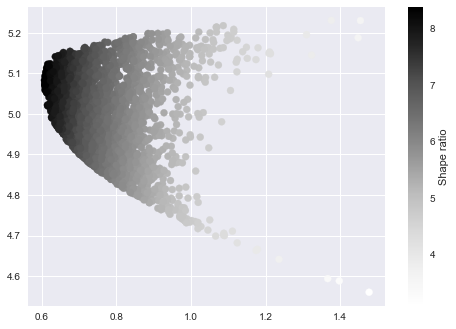

In [135]:
plt.scatter(kr_port_risks,kr_port_returns, c=kr_port_returns/kr_port_risks)
plt.colorbar(label='Shape ratio')
plt.show()